# k-평균 알고리즘(k-Means Algorithm)
- 순서
    1. 초기화: k개의 중심점 설정
    2. 각 데이터를 가장 가까운 중심점의 군집(cluster)에 할당
    3. 각 군집에 속한 데이터들의 평균을 새로운 중심점으로 갱신
    - 2, 3 번 반복

- 종료 조건
    - 중심점에 변화가 없을 때까지
    - 각 데이터의 소속 클러스터가 바뀌지 않을 때까지
    - 지정된 횟수만큼

- 장점
    - 쉽고 간결함
    - 일반적인 군집화에서 가장 많이 활용됨
    
- 단점
    - feature 개수가 많을 경우 군집화 정확도가 떨어짐
    - 반혹 횟수가 많을 경우 수행 시간이 오래 걸림
    - 몇 개의 군집으로 결정하기 어려움

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
kmeans = KMeans(n_clusters=3, max_iter=3000)
kmeans.fit(df)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.data)

df['cluster'] = kmeans.labels_
df['component1'] = iris_pca[:, 0]
df['component2'] = iris_pca[:, 1]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,component1,component2
0,5.1,3.5,1.4,0.2,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,-2.728717,0.326755


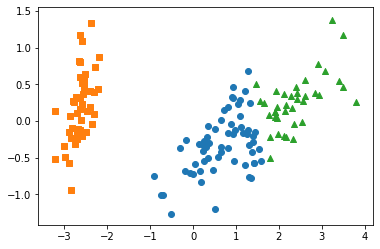

In [6]:
marker0_index = df[df['cluster'] == 0].index
marker1_index = df[df['cluster'] == 1].index
marker2_index = df[df['cluster'] == 2].index

plt.scatter(x=df.loc[marker0_index, 'component1'], y=df.loc[marker0_index, 'component2'], marker='o')
plt.scatter(x=df.loc[marker1_index, 'component1'], y=df.loc[marker1_index, 'component2'], marker='s')
plt.scatter(x=df.loc[marker2_index, 'component1'], y=df.loc[marker2_index, 'component2'], marker='^')
plt.show()

### 군집화 데이터를 직접 생성해보기

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8)
print(X.shape, y.shape)
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [9]:
df = pd.DataFrame(data=X, columns=['feature1', 'feature2'])
df['target'] = y
df.head()

,feature1,feature2,target
0,-7.328312,10.772593,0
1,-7.838865,11.073380,0
2,-6.302065,0.760110,2
3,-6.790228,0.883956,2
4,-9.168352,10.761769,0


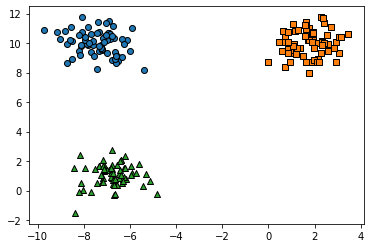

In [10]:
targets = np.unique(y)
markers = ['o', 's', '^']
for target in targets:
    cluster = df[df['target'] == target]
    plt.scatter(x=cluster['feature1'], y=cluster['feature2'], edgecolor='k', marker=markers[target])
plt.show()

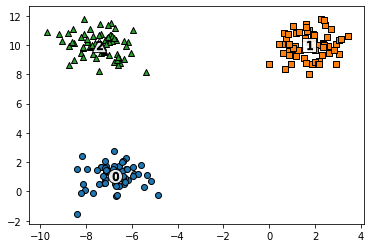

In [13]:
kmeans = KMeans(n_clusters=3, max_iter=200)
labels = kmeans.fit_predict(X)
df['label'] = labels
centers = kmeans.cluster_centers_
uniques = np.unique(labels)
markers = ['o', 's', '^']
for label in uniques:
    cluster = df[df['label'] == label]
    center = centers[label]
    plt.scatter(x=cluster['feature1'], y=cluster['feature2'], edgecolor='k', marker=markers[label])
    plt.scatter(x=center[0], y=center[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center[0], y=center[1], s=70, color='k', edgecolor='k', marker='$%d$' %label)
plt.show()